#**Imports**

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# **Dataset**

### **Analysis**




* This dataframe contains 150 entries in total with 5 columns including "sepal_length", "sepal_width", "petal_length" and "petal_width" with float64 data type for the features and "species" with categorial data for the lables.
* There are three categories for "species" and each of them have 50 instances.
* There is no missing data as all the columns have 150 non-null values.
* We can see from the visualised relationship between the sepal and petal length and width that:
 * Setosa species has smaller sepal length higher width and also it has smaller petal length and width.
 * Versicolor lies in almost middle for length as well as width for both petal and sepal values.
 * Virginica has larger sepal lengths and smaller sepal widths and has the largest of petal lengths and widths.

* We can see from the box plot that:
 * Setosa is having smaller feature and less distributed
 * Versicolor is distributed in a average manner and average features
 * Virginica is highly distributed with large no .of values and features
 * Clearly the mean/ median values are being shown by each plots for various features(sepal length & width, petal length & width)

In [216]:
df = pd.read_csv('IRIS.csv')

df.info() # General information about dataframe
df.describe() # Statistical summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


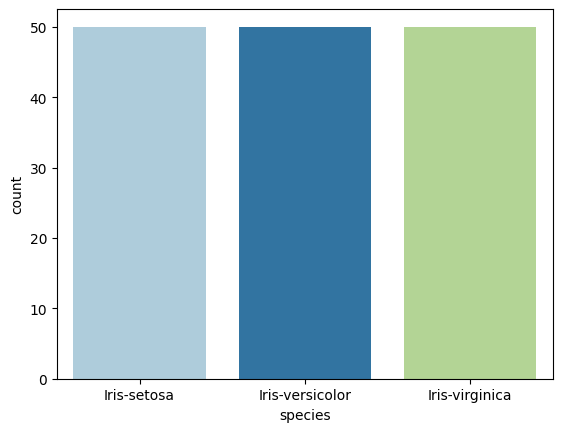

In [217]:
# Count of each species in dataframe
sns.countplot(x='species', data=df, hue='species', palette='Paired')
plt.show()

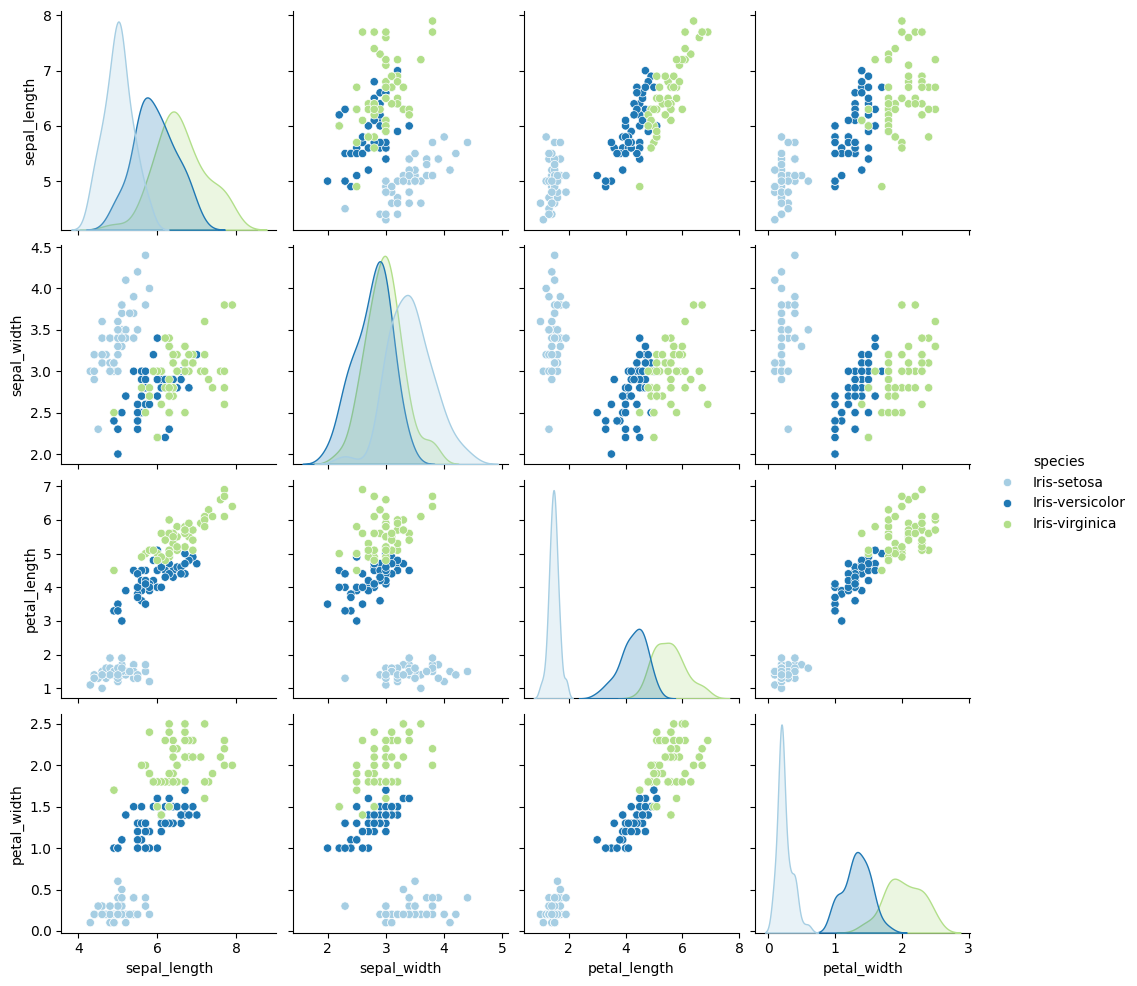

In [218]:
# Visualization of relationship between each features
sns.pairplot(data=df, hue='species', palette='Paired')

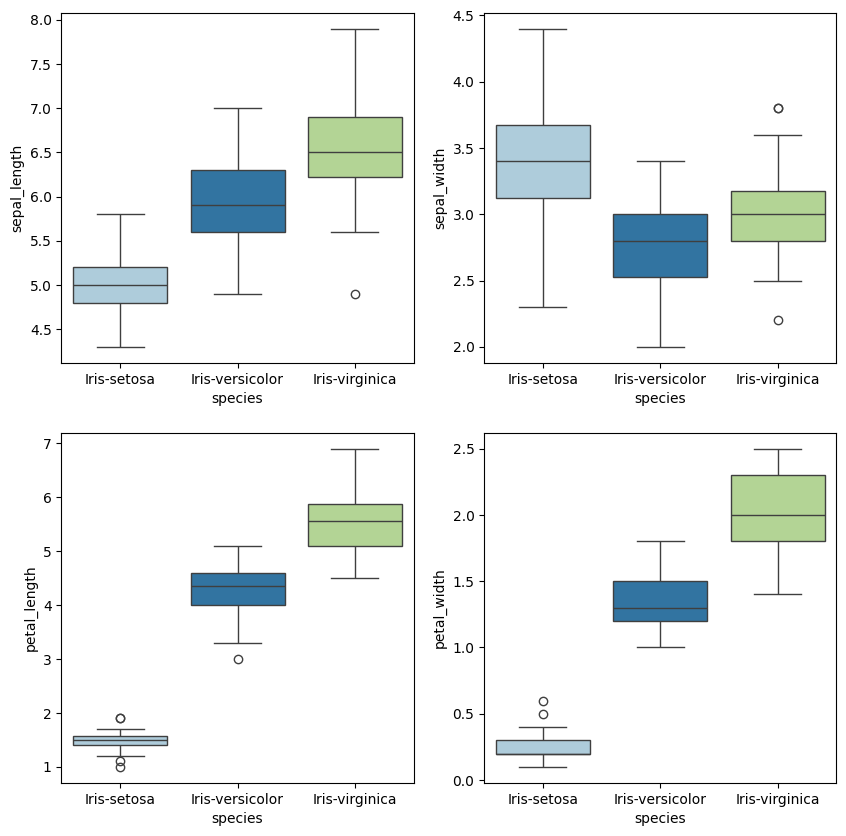

In [219]:
# Box plots representing the distribution of each feature
def graph(y):
    sns.boxplot(x='species', y=y, data=df, hue= 'species', palette='Paired')

plt.figure(figsize=(10,10))

# Adding the subplot at the specified grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

### **Preprocessing**


The only thing we need to do is to encode the categorial data values of species to numeric values.

In [220]:
le = preprocessing.LabelEncoder()
le.fit(df.species)

df['class_of_species'] = le.transform(df.species)

df

,sepal_length,sepal_width,petal_length,petal_width,species,class_of_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [221]:
# Spliting features(x) and target(y)
x = df.iloc[:,:-2]
y = df.iloc[:, 5]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [222]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_of_species, dtype: int64

We choose 80% of the data for training the data and 20% of it for testing the data.
We will divide the data to 4 sets x_train, x_test, y_train, y_test

In [223]:
# Splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

#**Training the models**

The models are built by tuning the hyper-parameters with Exhaustive Grid Search algorithm on the estimators related to each model.
The strategy for spliting the data is 5-fold cross validation for all the models.

### **Decision Tree Classifier**

In [224]:
# Defining the parameters grid for decision tree estimator
DT_param_grid = [{'max_depth': [1, 2, 3, 4, 5] ,
                  'min_samples_split': [2, 4, 6, 8, 10],
                  'min_samples_leaf': [1, 2, 3, 4, 5],
                  'max_features': ['auto','sqrt', 'log2'],
                  'criterion': ['gini', 'entropy']}]

# Searching for the best parameters of the decision tree classifier
DT_clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=DT_param_grid, scoring='accuracy', cv=5)
DT_clf.fit(x_train, y_train)

# Summarize results
print("Best accuracy is %f using parameters %s" % (DT_clf.best_score_, DT_clf.best_params_))

Best accuracy is 0.983333 using parameters {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [225]:
# Defining the model with best estimator with best hyper-parameters
DT_model = DT_clf.best_estimator_
# Fitting the model with training set
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=3)

In [226]:
# Testing the model with test set
DT_prediction = DT_model.predict(x_test)

In [227]:
print("Accuracy of DT model in percentage:" , round(metrics.accuracy_score(y_test, DT_prediction), 2)*100)

Accuracy of DT model in percentage: 93.0


<function matplotlib.pyplot.show(close=None, block=None)>

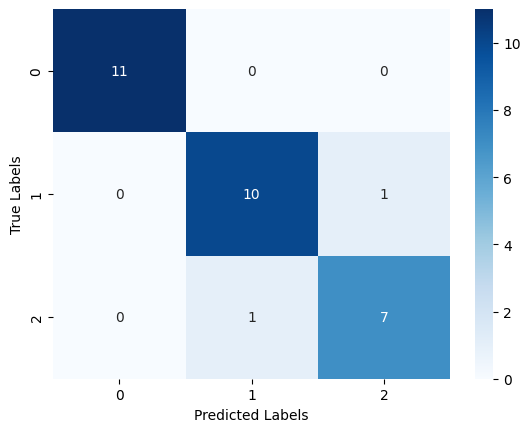

In [228]:
# Evaluating decision tree with Confusion matrix and calssification report

cm = confusion_matrix(y_true=y_test, y_pred=DT_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show

In [229]:
print(classification_report(y_test, DT_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.91      0.91        11
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### **Support Vector Machine Classifier**

In [230]:
# Defining the parameters grid for support vector machine estimator
SVM_param_grid = [{'kernel': ['rbf','sigmoid','poly','linear'],
                   'C':[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
                   'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]}]

# Searching for the best parameters of the support vector machine classifier
SVM_clf = GridSearchCV(estimator=SVC(), param_grid=SVM_param_grid , cv=5)
SVM_clf.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (SVM_clf.best_score_, SVM_clf.best_params_))

Best: 0.983333 using {'C': 1.0, 'gamma': 1e-05, 'kernel': 'linear'}


In [231]:
# Defining the model with best estimator with best hyper-parameters
SVM_model = SVM_clf.best_estimator_
# Fitting the model with training set
SVM_model.fit(x_train, y_train)

SVC(gamma=1e-05, kernel='linear')

In [232]:
# Testing the model with test set
SVM_prediction1 = SVM_model.predict(x_test)

In [233]:
print("Accuracy of SVM model in percentage:" , round(metrics.accuracy_score(y_test, SVM_prediction), 2)*100)

Accuracy of SVM model in percentage: 30.0


<function matplotlib.pyplot.show(close=None, block=None)>

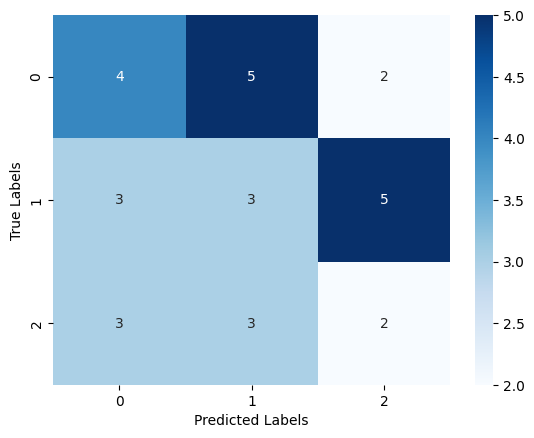

In [234]:
# Evaluating support vector machine with Confusion matrix and calssification report

cm = confusion_matrix(y_true=y_test, y_pred=SVM_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show

In [235]:
print(classification_report(y_test, SVM_prediction))

              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.27      0.27      0.27        11
           2       0.22      0.25      0.24         8

    accuracy                           0.30        30
   macro avg       0.30      0.30      0.30        30
weighted avg       0.31      0.30      0.30        30



### **Neural Network Classifier**

In [236]:
# Defining the parameters grid for neural network estimator
estimator = MLPClassifier()
NN_param_grid = [{'solver': ['lbfgs', 'sgd', 'adam'],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'learning_rate': ['constant', 'invscaling', 'adaptive'],
                  'alpha': [1, 2, 3, 4],
                  'hidden_layer_sizes': [2, 5, 10, 20, 30]}]

# Searching for the best parameters of the neural network classifier
NN_clf = GridSearchCV(estimator=MLPClassifier(), param_grid=NN_param_grid, scoring='accuracy', cv=5)
NN_clf.fit(x_train, y_train)

print("Best accuracy is %f using parameters %s" % (NN_clf.best_score_, NN_clf.best_params_))

Best accuracy is 0.983333 using parameters {'activation': 'tanh', 'alpha': 3, 'hidden_layer_sizes': 30, 'learning_rate': 'adaptive', 'solver': 'adam'}


In [237]:
# Defining the model with best estimator with best hyper-parameters
NN_model = NN_clf.best_estimator_
# Fitting the model with training set
NN_model.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=3, hidden_layer_sizes=30,
              learning_rate='adaptive')

In [238]:
# Testing the model with test set
NN_prediction = NN_model.predict(x_test)

In [239]:
print("Accuracy of NN model in percentage:" , round(metrics.accuracy_score(y_test, NN_prediction), 2)*100)

Accuracy of NN model in percentage: 83.0


<function matplotlib.pyplot.show(close=None, block=None)>

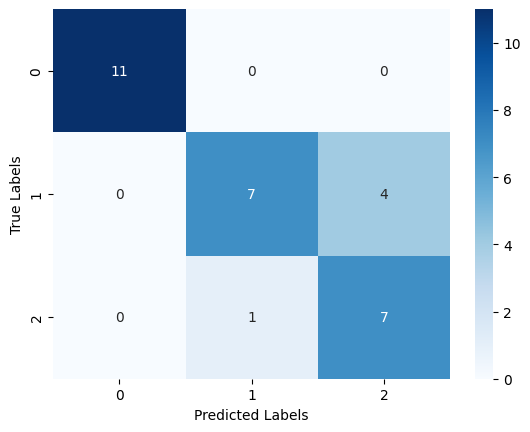

In [240]:
# Evaluating neural network with Confusion matrix and calssification report

cm = confusion_matrix(y_true=y_test, y_pred=NN_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show

In [241]:
print(classification_report(y_test, NN_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.64      0.74        11
           2       0.64      0.88      0.74         8

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.82        30
weighted avg       0.86      0.83      0.83        30



# **Comparing the models**

In [248]:
models = ['DT_model', 'SVM_model', 'NN_model']

accuracy_scores = [metrics.accuracy_score(y_test, DT_prediction), metrics.accuracy_score(y_test, SVM_prediction), metrics.accuracy_score(y_test, NN_prediction)]
precision_scores = [metrics.precision_score(y_test, DT_prediction, average='macro'), metrics.precision_score(y_test, SVM_prediction, average='macro'), metrics.precision_score(y_test, NN_prediction, average='macro')]
recall_scores = [metrics.recall_score(y_test, DT_prediction, average='macro'), metrics.recall_score(y_test, SVM_prediction, average='macro'), metrics.recall_score(y_test, NN_prediction, average='macro')]
f1_scores = [metrics.f1_score(y_test, DT_prediction, average='macro'), metrics.f1_score(y_test, SVM_prediction, average='macro'), metrics.f1_score(y_test, NN_prediction, average='macro')]

results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1_score': f1_scores
    })

print(results)

       Model  Accuracy  Precision    Recall  F1_score
0   DT_model  0.933333   0.928030  0.928030  0.928030
1  SVM_model  0.300000   0.298316  0.295455  0.296325
2   NN_model  0.833333   0.837121  0.837121  0.824561
